<a href="https://colab.research.google.com/github/sahug/python-data-structure/blob/main/Data%20Structure%20-%20Python%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Structure - Python Tree**

**Important Notes**

- **Node.data** - Returns **Node Value**

- **Node.left** - Returns **Left Node**

- **Node.Right** - Returns **Right Node**

- We handle **one Node at a time**. For the Node we are at keep travelling its **Left**, **Root** and **Right** Nodes, based on traversal strategy, until we reach a leaf.

- If **Right** and **Left** Nodes are **None** we are on **Leaf Node**.

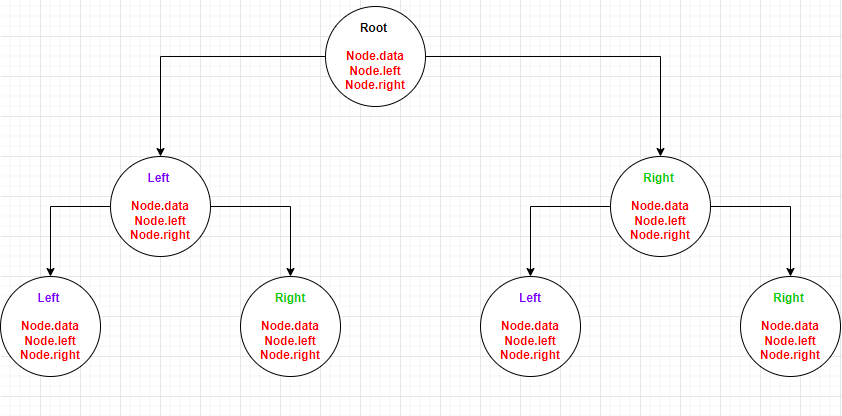

**Node**

The Node can be a Root node or any other node. But it will always have the below 3 properties.

- The Node value
- Left Node
- Right Node

When the Node is created it will only have node value and both Left and Right node will be none.

Right and Left node can only be added after the node is created.

**Note:** 
1. Here we will create a **Binary Tree** where the right nodes have greater values then root node and the left nodes have less value than root nodes.
2. We will use **Recurssion** to keep traversing the nodes

In [ ]:
class Node:

  # Node.data => Returns Node Value
  # Node.left => Returns Left Node
  # Node.Right => Returns Right Node
  # Node.level => Returns Root Node Level. In here only used for vertical traversal.
  def __init__(self, data):
    self.left = None
    self.data = data
    self.right = None
    self.level = None 

**Tree**

To add child nodes and perform many other operations like, insert, delete, traverse nodes.


In [ ]:
class Tree:

  # Since any node need to have a data. Data is a must to be passed.
  def createNode(self, data):

    # Create Node Object. This will create a node with data value and Left and Right null.
    return Node(data)

  # -------------------------------------------------------------------------------------------------------------

  # Create child nodes.
    # Two Required parameters. 
      # 1) Where to add the new node => node 
      # 2) The value of the new node => value

  # Method walkthru
    # First, check if the node we are adding new nodes to exist or not. If not create a node first.
    # Second, if the new node data is lesser than the current node, add the new node to Left. Passing Node => node.left
    # Third, if the new node data is greater than the current node, add the new node to Right. Passing Node => node.right
    # Return the node object that will contain, root, left and right node

  def insert(self, node, data):

    # Create a node if there are no node.
    if node is None:
      return self.createNode(data)
    
    # Binary Tree conditions

    # If new node value is less than the current node value. Add the data to a Left node.    
    if data < node.data:
      node.left = self.insert(node.left, data)
    else:
    # If data value is greater than the current node value. Add the data to a Right node.
      node.right = self.insert(node.right, data)

    # Return the node object. We can see what it contains in the Node class.
    return node

  # -------------------------------------------------------------------------------------------------------------

  # Traverse Tree
    # Inorder => Left - Root - Right
    # Preorder => Root - Left - Right 
    # Postorder => Left - Right - Root

  # One way to remember this is to look at the position of the Root Node. 
    # Root in middle => Inorder
    # Root at the begining => Preorder
    # Root at the end => Postorder
    # Left always comes before Right.

  def traverse_in_order(self, root):
    if root is not None:      
      self.traverse_in_order(root.left)   
      print(root.data)                    
      self.traverse_in_order(root.right)

  
  def traverse_pre_order(self, root):
    if root is not None:
      print(root.data)
      self.traverse_in_order(root.left)      
      self.traverse_in_order(root.right)  

  
  def traverse_post_order(self, root):
    if root is not None:      
      self.traverse_in_order(root.left)      
      self.traverse_in_order(root.right)  
      print(root.data)


  # Number of edges between the Root and the last Leaf. 5 to 30 has 4 edges.
  def height(self, root):
    if root is None:
      return -1
    return max(self.height(root.left), self.height(root.right)) + 1


  def level_traversal(self, root):

    if root is None:
      return []
    
    # List to queue the next nodes
    queue = [root]

    # List to collect the next nodes
    next_queue = []

    # List to collect the nodes based on th level
    level = []

    # List tp collect all nodes in each levels
    result = []    

    # Steps:
    # Queue the Root Node
    # Add Root Node to level list
    # Add Left and Right nodes of the Root Node to the next_queue list. These Nodes are next in queue to process.
    # Add Level list to Result list
    # Empty Level List. As we will create a new Level List for each Level.
    # Queue has now new_queues Nodes
    # Empthy the new_queues
    while queue != []:

      for root in queue:
        level.append(root.data)

        if root.left is not None:
          next_queue.append(root.left)

        if root.right is not None:
          next_queue.append(root.right)

      result.append(level)
      level = []
      queue = next_queue
      next_queue = []

    return result

  # 1. For Root Node, Hd = 0
  # 2. For Left Node, Hd = Hd_parent - 1
  # 3. For Right Node, Hd = Hd_parent + 1

  def vertical_traversal(self, root):

    root.level = 0
    d = dict()
    q = [root]
    next_q = []

    if root is None:
      return 

    while q!= []:
      for root in q:
        if root.level not in d.keys() and d. keys() != []:          
          d[root.level] = [root.data]
        else: d[root.level].append(root.data)
        
        if root.left is not None:
          root.left.level = root.level - 1
          next_q.append(root.left)

        if root.right is not None:
          root.right.level = root.level + 1
          next_q.append(root.right)

      q = next_q
      next_q = []

    for i in sorted(d):
      print(d[i]) 
    

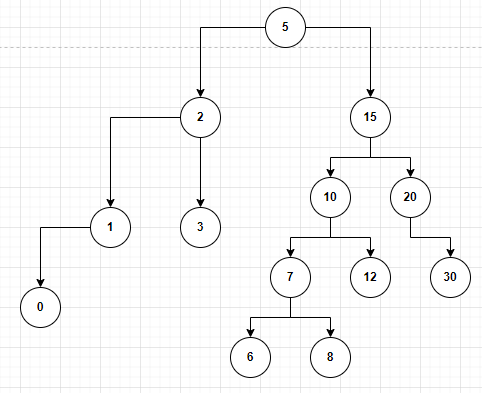

In [ ]:
# Create tree Object
tree = Tree()

In [ ]:
# Create Root Node with value 5
root = tree.createNode(5)
print("Root Node :",  root.data, "\n")

Root Node : 5 



In [ ]:
# Insert other nodes
# Nodes are placed in the Tree as they are inserted. No ordering happens during the insert. 
# We just find the place for the node being inserted and put it there.
tree.insert(root, 2)
tree.insert(root, 15)
tree.insert(root, 7)
tree.insert(root, 10)
tree.insert(root, 12)
tree.insert(root, 20)
tree.insert(root, 30)
tree.insert(root, 6)
tree.insert(root, 8)
tree.insert(root, 3)
tree.insert(root, 1)
tree.insert(root, 0)

**How Traversal is implemented?**

**Example: Inorder**

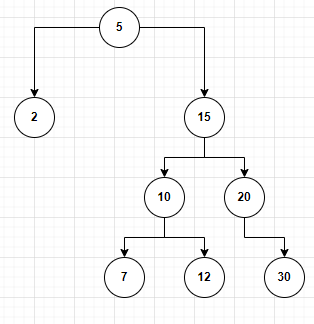

**Lets Start with Node 5.**

>Go to the **Left** Node of **5. => 2**

>>Go to the **Left** Node of **2**. Its None.

>>Go to the **Root** Node of **2**. **Its 2 itself**. Print **2**.

>>Go to the **Right** Node of **2**. Its None

>Go to the **Root** Node of **5**. Its **5** itself. Print **5**.

>Go to the **Right** Node of **5**. => **15**

>>Go to the **Left** Node of **15**. => **10**

>>>Go to the **Left** Node of **10. => 7**

>>>>Go to the **Left** Node of **7**. Its None.

>>>>Go to the **Root** Node. Its **7** itself. Print **7**.

>>>>Go to the **Right** Node of **7**. Its None

>>>Go to the **Root** Node of **10**. Its **10** itself. Print **10**.

>>>Go to the **Right** Node of **10. => 12**

>>>>Go to the **Left** Node of **12**. Its None.

>>>>Go to the **Root** Node of **12*. Its **12** itself. Print **12**.

>>>>Go to the **Right** Node of **12**. Its None

>Go to the **Root** Node of **15**. Its **15** itself. Print **15**

>Go to the **Right** Node of **15**. => **20**

>>Go to the **Left** Node of **20**. Its None.

>>Go to the **Root** Node of **20**. Its **20** itself. Print **20**

>>Go to the **Right** Node of **20**. => **30**

>>>Go to the **Left** Node of **30**. Its None.

>>>Go to the **Root** Node of **30**. Its **30** itself. Print **30**

>>>Go to the **Right** Node of **30**. Its None

In [ ]:
# Traverse Inorder
print("Inorder Traversal")
tree.traverse_in_order(root)
print("\n")

Inorder Traversal
0
1
2
3
5
6
7
8
10
12
15
20
30




In [ ]:
# Traverse Preorder
print("Preorder Traversal")
tree.traverse_pre_order(root)
print("\n")

Preorder Traversal
5
0
1
2
3
6
7
8
10
12
15
20
30




In [ ]:
# Traverse Postorder
print("Postorder Traversal")
tree.traverse_post_order(root)
print("\n")

Postorder Traversal
0
1
2
3
6
7
8
10
12
15
20
30
5




In [ ]:
# Height of Tree
print("Height of Tree", tree.height(root), "\n")

Height of Tree 4 



In [ ]:
# Level Traversal
tree.level_traversal(root)

[[5], [2, 15], [1, 3, 7, 20], [0, 6, 10, 30], [8, 12]]

In [ ]:
# vertical Traversal
tree.vertical_traversal(root)

[0]
[1]
[2, 6]
[5, 3, 7, 8]
[15, 10]
[20, 12]
[30]


**Example to insert nodes without providing a Node.**

In [ ]:
class Tree2:
  
  def __init__(self): 
    self.root = None

  def insert_val(self, val):

    if self.root is None:
      self.root = Node(val)                       
      return
            
    root = self.root

    while 1:
        if val < root.data:
            if root.left is not None:
                root = root.left
            else: 
                root.left = Node(val)                       
                break
        elif val > root.data:
            if root.right is not None:
                root = root.right
            else: 
                root.right = Node(val)                     
                break   

def preOrder(root):
    if root == None:
        return
    print (root.data, end=" ")
    preOrder(root.left)
    preOrder(root.right)

# Create tree Object
tree_val = Tree2()

# Insert Nodes
tree_val.insert_val(2)
tree_val.insert_val(15)
tree_val.insert_val(7)
tree_val.insert_val(10)
tree_val.insert_val(12)
tree_val.insert_val(20)
tree_val.insert_val(30)
tree_val.insert_val(6)
tree_val.insert_val(8)
tree_val.insert_val(3)
tree_val.insert_val(1)
tree_val.insert_val(0)

preOrder(tree_val.root)

2 1 0 15 7 6 3 10 8 12 20 30 